In [1]:
from google.colab import files
uploaded = files.upload()

Saving team_factor_30.csv to team_factor_30.csv


In [2]:
import pandas as pd
df = pd.read_csv("team_factor_30.csv")
features = ['a_eFGp', 'a_TOVp', 'a_FTr', 'a_ORBp']
X = df[features].values
Y = df['result'].values

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Your original Logistic Regression class using Gradient Descent (unchanged)
class LogitRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b = 0

        for _ in range(self.iterations):
            self.update_weights(X, Y)
        return self

    def update_weights(self, X, Y):
        A = 1 / (1 + np.exp(-(X.dot(self.W) + self.b)))
        tmp = (A - Y)
        dW = np.dot(X.T, tmp) / self.m
        db = np.sum(tmp) / self.m
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db

    def predict(self, X):
        Z = 1 / (1 + np.exp(-(X.dot(self.W) + self.b)))
        return np.where(Z > 0.5, 1, 0)


# New Logistic Regression class using Newton's Method
class LogitRegressionNewton:
    def __init__(self, iterations=10):
        self.iterations = iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, Y):
        self.m, self.n = X.shape
        # Add intercept term by appending a column of ones to X
        X_intercept = np.hstack((np.ones((self.m, 1)), X))  # shape (m, n+1)
        self.theta = np.zeros(self.n + 1)  # weights including bias

        for i in range(self.iterations):
            z = X_intercept.dot(self.theta)
            h = self.sigmoid(z)

            # Gradient vector
            grad = X_intercept.T.dot(h - Y)

            # Hessian matrix
            S = np.diag(h * (1 - h))
            H = X_intercept.T.dot(S).dot(X_intercept)

            try:
                delta = np.linalg.solve(H, grad)  # Solve H * delta = grad
            except np.linalg.LinAlgError:
                print("Hessian is singular at iteration", i)
                break

            self.theta -= delta  # Newton's update step

        # Separate weights and bias
        self.b = self.theta[0]
        self.W = self.theta[1:]
        return self

    def predict(self, X):
        Z = X.dot(self.W) + self.b
        prob = self.sigmoid(Z)
        return np.where(prob >= 0.5, 1, 0)


# Load your data
df = pd.read_csv("team_factor_30.csv")

# Select features and target
features = ['a_eFGp', 'a_TOVp', 'a_FTr', 'a_ORBp']
X = df[features].values
Y = df['result'].values  # Ensure this is binary 0 or 1

# Handle missing values using an imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split into train/test sets using the imputed data
X_train, X_test, Y_train, Y_test = train_test_split(
    X_imputed, Y, test_size=0.25, random_state=42
)

# Create and train your custom logistic regression model (gradient descent)
model_gd = LogitRegression(learning_rate=0.01, iterations=1000)
model_gd.fit(X_train, Y_train)

# Create and train your logistic regression model using Newton's Method
model_newton = LogitRegressionNewton(iterations=10)
model_newton.fit(X_train, Y_train)

# Predict test set
Y_pred_gd = model_gd.predict(X_test)
Y_pred_newton = model_newton.predict(X_test)

# Calculate accuracy for your models
accuracy_gd = np.mean(Y_pred_gd == Y_test) * 100
accuracy_newton = np.mean(Y_pred_newton == Y_test) * 100

print(f"Accuracy of custom Logistic Regression (Gradient Descent): {accuracy_gd:.2f}%")
print(f"Accuracy of custom Logistic Regression (Newton's Method): {accuracy_newton:.2f}%")


Accuracy of custom Logistic Regression (Gradient Descent): 56.63%
Accuracy of custom Logistic Regression (Newton's Method): 57.86%


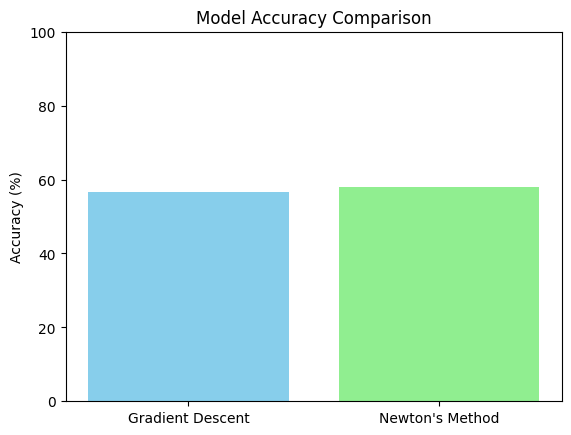

In [4]:
import matplotlib.pyplot as plt

accuracies = [accuracy_gd, accuracy_newton]
labels = ['Gradient Descent', 'Newton\'s Method']

plt.bar(labels, accuracies, color=['skyblue', 'lightgreen'])
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)
plt.show()

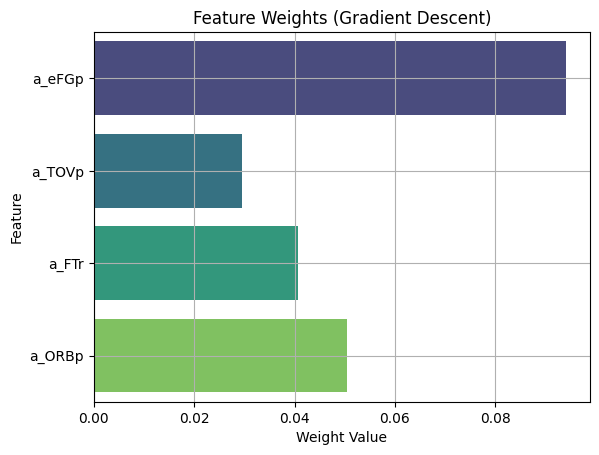

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt # Import matplotlib.pyplot

features = ['a_eFGp', 'a_TOVp', 'a_FTr', 'a_ORBp']
# Change 'model' to 'model_gd' to access the weights of the Gradient Descent model
weights = model_gd.W

sns.barplot(x=weights, y=features, palette="viridis")
plt.title('Feature Weights (Gradient Descent)')
plt.xlabel('Weight Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()